# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


## Load the Data

In [3]:
df = pd.read_csv('Traffic_Accidents.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21.0,3.0,2.0,2.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20.0,2.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1.0,3.0,2.0,2.0,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20.0,3.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25244 entries, 0 to 25243
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   25244 non-null  int64  
 1   Accident_Index                               25244 non-null  object 
 2   Location_Easting_OSGR                        25243 non-null  float64
 3   Location_Northing_OSGR                       25243 non-null  float64
 4   Longitude                                    25243 non-null  float64
 5   Latitude                                     25243 non-null  float64
 6   Police_Force                                 25243 non-null  float64
 7   Accident_Severity                            25243 non-null  float64
 8   Number_of_Vehicles                           24837 non-null  float64
 9   Number_of_Casualties                         25243 non-null  float64
 10

In [5]:
df.shape

(25244, 30)

In [7]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21.0,3.0,2.0,2.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20.0,2.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1.0,3.0,2.0,2.0,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20.0,3.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [8]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
25239,80078,200520E515303,407420.0,285190.0,-1.892222,52.464573,20.0,3.0,2.0,1.0,...,4540.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,E01009366,2005.0
25240,96357,200530A000590,442420.0,341890.0,-1.369764,52.972672,30.0,3.0,1.0,1.0,...,11.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,2.0,Yes,E01019703,2005.0
25241,36771,200505DH00215,353400.0,395430.0,-2.703226,53.453546,5.0,3.0,1.0,1.0,...,572.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01006821,2005.0
25242,103395,200532B071905,512700.0,357040.0,-0.318246,53.098650,32.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Frost/Ice,2.0,Yes,E01026210,2005.0
25243,97721,200530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.sample(8)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
15898,67575,2.01E+12,426630.0,437610.0,-1.596838,53.834067,13.0,3.0,1.0,2.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01011687,2005.0
20102,1953,200501CW11180,529820.0,180190.0,-0.130856,51.505685,1.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01004736,2005.0
16023,81865,200520G082401,391010.0,298490.0,-2.134129,52.584114,20.0,3.0,2.0,1.0,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,1.0,Yes,E01010521,2005.0
1711,59103,2.01E+12,461830.0,451080.0,-1.059310,53.952130,12.0,2.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,No,E01013363,2005.0
13905,63252,2.01E+12,448780.0,423350.0,-1.262538,53.704303,13.0,3.0,2.0,4.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01011809,2005.0
15992,21631,200501WW50697,524410.0,176870.0,-0.209935,51.477064,1.0,3.0,1.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01001906,2005.0
16722,58583,200511DJ19350,428970.0,515590.0,-1.553800,54.534771,11.0,3.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01012354,2005.0
19859,82081,200520H004301,401430.0,296310.0,-1.980346,52.564590,20.0,3.0,2.0,1.0,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01010335,2005.0


In [10]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,25244.000000,25243.000000,25243.000000,25243.000000,25243.000000,25243.000000,25243.000000,24837.000000,25243.000000,25004.000000,25243.000000,25243.000000,25243.000000,24737.000000,25243.000000,25243.000000,25243.000000,25243.0
mean,52367.127555,439231.357208,339513.385493,-1.431984,52.947512,11.107040,2.847562,1.840198,1.357525,4.119221,155.325912,4.086440,1020.409500,36.693617,2.936537,332.709504,1.249416,2005.0
std,30201.263868,66488.741420,115807.993180,0.972261,1.045486,9.540693,0.391729,0.709742,0.799788,1.937920,113.972411,1.417451,1878.365616,12.653442,3.146216,1189.244134,0.432775,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,26190.750000,387780.000000,195270.000000,-2.184544,51.641331,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52355.500000,429140.000000,362660.000000,-1.557929,53.152834,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,69.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78489.250000,514985.000000,416705.000000,-0.325263,53.644734,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,640.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104945.000000,559570.000000,655260.000000,0.349947,55.790657,48.000000,3.000000,18.000000,14.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9705.000000,3.000000,2005.0


In [11]:
print("Num of Duplication :", df.duplicated().sum())


Num of Duplication : 0


In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,1
Location_Northing_OSGR,1
Longitude,1
Latitude,1
Police_Force,1
Accident_Severity,1
Number_of_Vehicles,407
Number_of_Casualties,1


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [13]:
df_cleaned = df.copy()

In [14]:
# Remove outliers
def cap_floor_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned = cap_floor_outliers(df_cleaned, numeric_columns)


In [15]:
# Impute Missing Data
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')


df_cleaned[numeric_columns] = imputer_num.fit_transform(df_cleaned[numeric_columns])

categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = imputer_cat.fit_transform(df_cleaned[categorical_columns])


In [16]:
# Scalling
scaler = StandardScaler()
df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [17]:
# Reduce dimentions using PCA
pca_numeric = PCA(n_components=0.95)
pca_numeric_components = pca_numeric.fit_transform(df_cleaned[numeric_columns])


In [18]:
 # One-Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(df_cleaned[categorical_columns])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
pca_categorical = PCA(n_components=50)  # Adjust the number of components based on memory limitations
pca_categorical_components = pca_categorical.fit_transform(encoded_categorical)


In [20]:
processed_data = np.hstack((pca_numeric_components, pca_categorical_components))

In [21]:
  processed_data.shape

(25244, 58)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [22]:
# Longitude and Latitude: dentify geographical locations with higher concentration of accidents
# Accident_Severity: prioritizing areas that may need safety interventions

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[['Longitude', 'Latitude', 'Accident_Severity']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

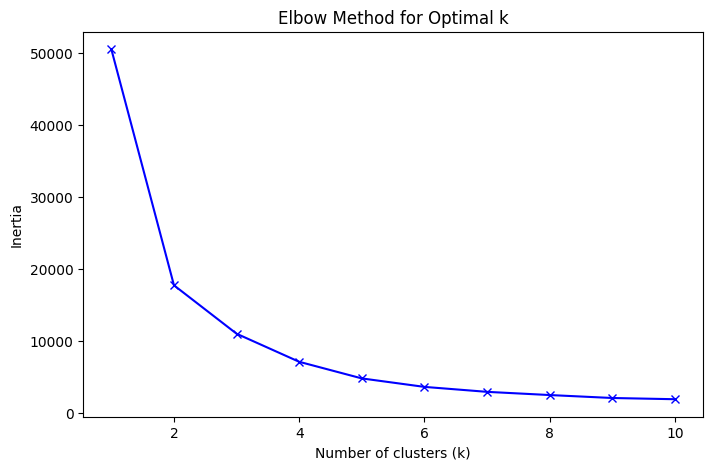

In [26]:

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [27]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)


df_cleaned[['Longitude', 'Latitude', 'Accident_Severity', 'Cluster']].head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Longitude,Latitude,Accident_Severity,Cluster
0,-0.860814,-0.346022,0.0,2
1,-0.381049,-0.465934,0.0,2
2,1.136485,-1.400581,0.0,1
3,-0.562568,-0.484094,0.0,2
4,-0.253887,-0.157139,0.0,2


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

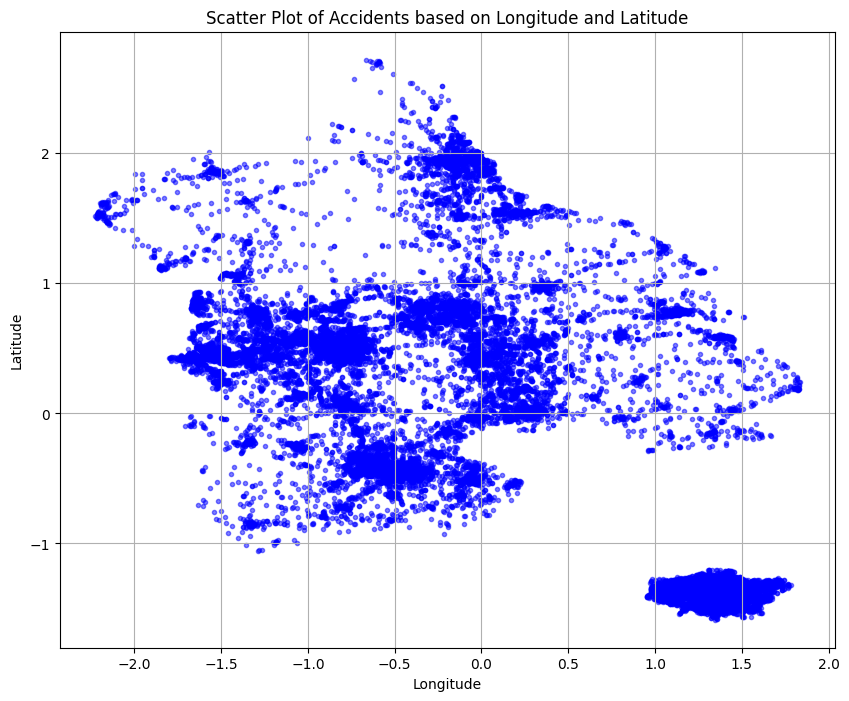

In [28]:

plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], c='blue', alpha=0.5, marker='.')
plt.title('Scatter Plot of Accidents based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

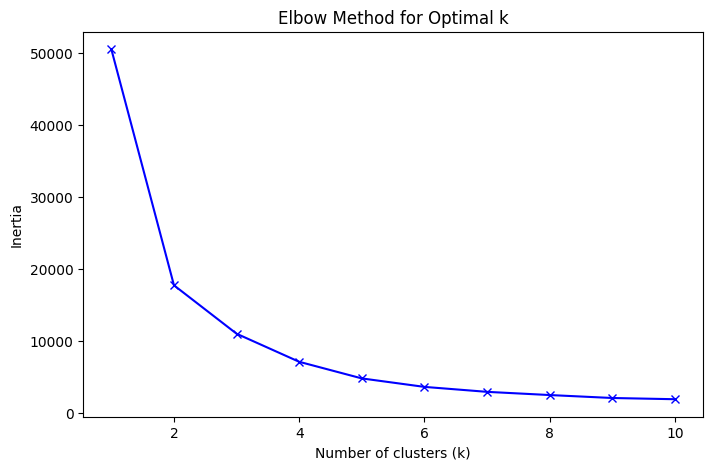

In [29]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [30]:
k_optimal = 3

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_scaled)

df_cleaned[['Longitude', 'Latitude', 'Accident_Severity', 'Cluster']].head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Longitude,Latitude,Accident_Severity,Cluster
0,-0.860814,-0.346022,0.0,2
1,-0.381049,-0.465934,0.0,2
2,1.136485,-1.400581,0.0,1
3,-0.562568,-0.484094,0.0,2
4,-0.253887,-0.157139,0.0,2


In [ ]:
# The optimal number of clusters is chosen at the "elbow point" in the inertia plot, where adding more clusters results in diminishing returns. This balances model complexity and accuracy, ensuring that the clusters are meaningful and well-separated.

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [31]:
sil_score = silhouette_score(df_scaled, df_cleaned['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')


Silhouette Score: 0.52


In [32]:
print(f'Inertia: {kmeans.inertia_:.2f}')


Inertia: 10998.61


## Plot the data points with their predicted cluster center

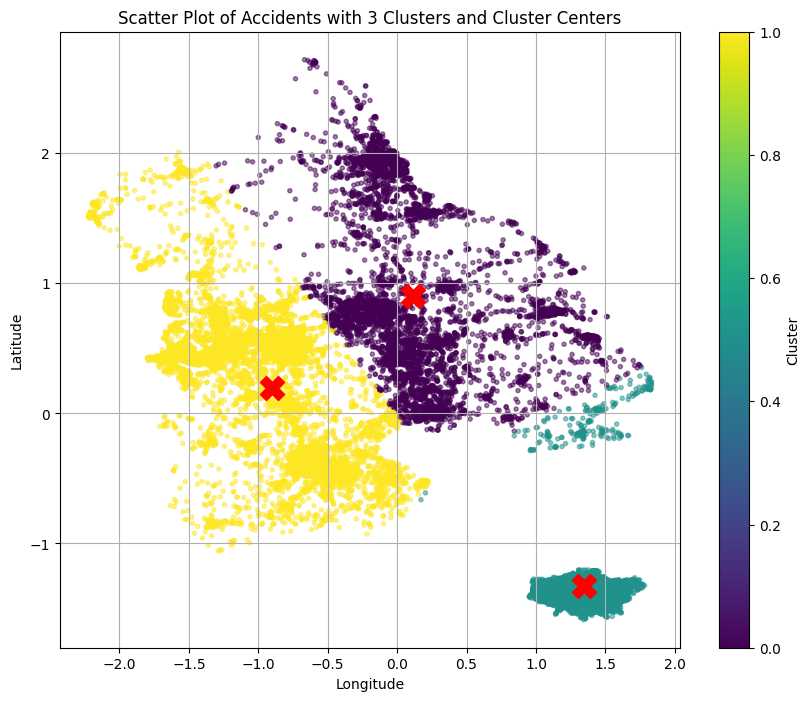

In [33]:

plt.figure(figsize=(10, 8))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], c=df_cleaned['Cluster'], cmap='viridis', alpha=0.5, marker='.')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f'Scatter Plot of Accidents with {k_optimal} Clusters and Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

A ) **Longitude**, **Latitude**, and **Accident Severity** because they directly help in understanding where accidents occur and how severe they are.


* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   
    A) The optimal number of clusters was determined using the **Elbow Method,** where I selected the point where adding more clusters had diminishing returns.

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?

   A) I used the **Silhouette Score and Inerti**a to evaluate the clusters. The Silhouette Score shows how well-separated the clusters are, and Inertia measures how compact the clusters are.

* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

   A) I could include more features like weather conditions or time of day. Trying other algorithms like DBSCAN might also reveal different clustering patterns.
   